In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('/path/to/EquiNet') # location of EquiNet repository

from chemprop.train import make_predictions
from chemprop.args import PredictArgs

In [3]:
# set your inputs
smiles1 = "CCO"
smiles2 = "O"
T = 373 # Temperature in K

In [4]:
# If you want a temporary path location for the results to write to
import tempfile

temp_preds = tempfile.mktemp(suffix='.csv')
temp_features = tempfile.mktemp(suffix='.csv')
temp_test = tempfile.mktemp(suffix='.csv')

In [5]:
# make input files

x1s = np.arange(0, 1.01, 0.01)
x2s = 1 - x1s

test_df = pd.DataFrame({
    'smiles1': [smiles1]*len(x1s),
    'smiles2': [smiles2]*len(x2s),
})
features_df = pd.DataFrame({
    'x1': x1s,
    'x2': x2s,
    'T': [T]*len(x1s),
    'log10P1sat': ['nan']*len(x1s),
    'log10P2sat': ['nan']*len(x1s),
})

print(test_df)
print(features_df)

    smiles1 smiles2
0       CCO       O
1       CCO       O
2       CCO       O
3       CCO       O
4       CCO       O
..      ...     ...
96      CCO       O
97      CCO       O
98      CCO       O
99      CCO       O
100     CCO       O

[101 rows x 2 columns]
       x1    x2    T log10P1sat log10P2sat
0    0.00  1.00  373        nan        nan
1    0.01  0.99  373        nan        nan
2    0.02  0.98  373        nan        nan
3    0.03  0.97  373        nan        nan
4    0.04  0.96  373        nan        nan
..    ...   ...  ...        ...        ...
96   0.96  0.04  373        nan        nan
97   0.97  0.03  373        nan        nan
98   0.98  0.02  373        nan        nan
99   0.99  0.01  373        nan        nan
100  1.00  0.00  373        nan        nan

[101 rows x 5 columns]


In [6]:
test_df.to_csv(temp_test, index=False)
features_df.to_csv(temp_features, index=False)

In [7]:
arguments = [
    '--test_path', temp_test,
    '--features_path', temp_features,
    '--preds_path', temp_preds,
    '--checkpoint_dir', '.',
    '--number_of_molecules', '2',
    '--num_workers', '0',
]

args = PredictArgs().parse_args(arguments)

preds = make_predictions(args=args)

Loading training args


/home/mcgillc2/repos/EquiNet/chemprop/utils.py:463: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  vars(torch.load(path, map_location=lambda storage, loc: storage)["args"]),


Setting molecule featurization parameters to default.
Loading data


101it [00:00, 438989.33it/s]
100%|██████████| 101/101 [00:00<00:00, 117804.42it/s]


Validating SMILES
Test size = 101


  0%|          | 0/1 [00:00<?, ?it/s]/home/mcgillc2/repos/EquiNet/chemprop/utils.py:117: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(path, map_location=

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "encoder.encoder.1.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.1.W_i.weight".
Loading pretrained parameter "encoder.encoder.1.W_h.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.weight".
Loading pretrained parameter "encoder.encoder.1.W_o.bias".
Loading pretrained parameter "readout.1.weight".
Loading pretrained parameter "readout.1.bias".
Loading pretrained parameter "readout.4.weight".
Loading pretrained parameter "readout.4.bias".
Loading pretrained parameter "intrinsic_vp.1.weight".
Loading pretrained parameter "intrinsic_vp.1.bias".
Loading pretrained parameter "intrinsic_vp.4.weight".
Loading pretrained paramet

100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

Saving predictions to /tmp/tmpeuoyb2tr.csv
Elapsed time = 0:00:01


In [8]:
preds_df = pd.DataFrame(preds, columns=['y1', 'y2', 'log10P', 'lngamma1', 'lngamma2', 'log10P1sat', 'log10P2sat'])
preds_df

,y1,y2,log10P,lngamma1,lngamma2,log10P1sat,log10P2sat
0,0.000000,1.000000,5.006928,1.809950,0.000000,5.343035,5.006928
1,0.110832,0.889168,5.053733,1.739290,0.000354,5.343035,5.006928
2,0.190320,0.809680,5.090444,1.671361,0.001389,5.343035,5.006928
3,0.249889,0.750111,5.119906,1.606045,0.003066,5.343035,5.006928
4,0.296034,0.703966,5.143970,1.543233,0.005349,5.343035,5.006928
...,...,...,...,...,...,...,...
96,0.955849,0.044151,5.345246,0.000757,0.877736,5.343035,5.006928
97,0.966538,0.033462,5.344771,0.000421,0.887134,5.343035,5.006928
98,0.977455,0.022545,5.344245,0.000185,0.896489,5.343035,5.006928
99,0.988607,0.011393,5.343667,0.000046,0.905801,5.343035,5.006928


Text(0.5, 1.0, 'Mixture of SMILES CCO (1) and \nSMILES O (2) at T = 373 K')

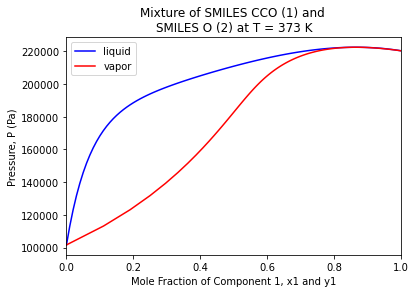

In [9]:
plt.plot(x1s, 10**preds_df['log10P'],label="liquid", color='blue')
plt.plot(preds_df["y1"], 10**preds_df['log10P'], label="vapor", color='red')
plt.legend()
plt.xlim(0, 1)
plt.ylabel('Pressure, P (Pa)')
plt.xlabel('Mole Fraction of Component 1, x1 and y1')
plt.title(f'Mixture of SMILES {smiles1} (1) and \nSMILES {smiles2} (2) at T = {T} K')